
# By Ketan Pawar

#      Importing Librearies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Reading data

In [2]:
#reading data from remote link
url = "http://bit.ly/w-data"

In [3]:
data=pd.read_csv(url)

In [4]:
#seeing the dimension of dataframe
data.shape

(25, 2)

In [5]:
#view first 5 rows of data
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [6]:
#view last 5 row of data
data.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [7]:
#type of data
data.dtypes

Hours     float64
Scores      int64
dtype: object

# Data Visualisation

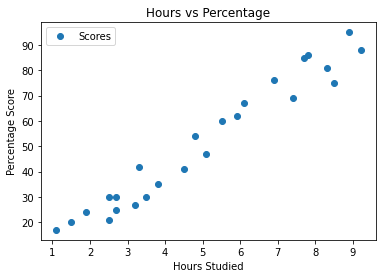

In [8]:
data.plot(x='Hours',y='Scores',style='o')
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

#### From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.

# Correlation 

In [9]:
data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


#### The variables are highly positively correlated.

# Identify Outlier in DATA

<AxesSubplot:>

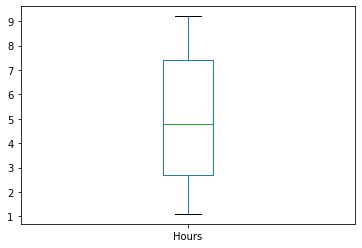

In [10]:
data['Hours'].plot.box()

<AxesSubplot:>

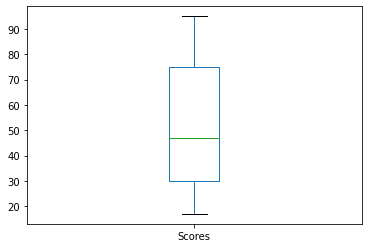

In [11]:
data['Scores'].plot.box()

### We plot boxplot to detect an outlier in each variables and for above boxplot we can clearly see that no outlier present in data .

# Linear Regression

#### Define X : Independent Variable and Y : Dependent Variable

In [12]:
x=data.drop(['Scores'],axis=1)

In [13]:
y=data['Scores']

In [14]:
x.head()

,Hours
0,2.5
1,5.1
2,3.2
3,8.5
4,3.5


In [15]:
y.head()

0    21
1    47
2    27
3    75
4    30
Name: Scores, dtype: int64

### To perform further we have split data into two parts;
####   (i) Train dataset : Its used to train model 
####    (ii) Test dataset : Its uesd to predict.


In [16]:
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.3, random_state=0) 

### Train the model on train dataset

In [17]:
from sklearn.linear_model import LinearRegression  
lreg= LinearRegression()  
lreg.fit(x_train, y_train) 

LinearRegression()

### Predict the test dataset result

In [18]:
y_pred=lreg.predict(x_test)
print(y_pred)

[17.05366541 33.69422878 74.80620886 26.8422321  60.12335883 39.56736879
 20.96909209 78.72163554]


## Evaluate the Model Using R square

In [19]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.9568211104435257

#### Here we get R_square is 0.96 which that implies our model is good fit

## Plot the Results

Text(0.5, 1.0, 'Actual vs Predicted')

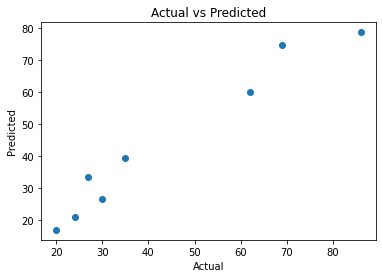

In [20]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')

## Predicted values

In [21]:
pred_y_df=pd.DataFrame({'Actual Scores':y_test,'Predicted Scores':y_pred,'Difference':y_test-y_pred})
pred_y_df

,Actual Scores,Predicted Scores,Difference
5,20,17.053665,2.946335
2,27,33.694229,-6.694229
19,69,74.806209,-5.806209
16,30,26.842232,3.157768
11,62,60.123359,1.876641
22,35,39.567369,-4.567369
17,24,20.969092,3.030908
24,86,78.721636,7.278364


In [22]:
hours_new=[9.25]
percentage=lreg.predict([hours_new])
print("Predicted Score is",percentage)

Predicted Score is [92.91505723]


### If a student studies for 9.25 hr/day then he/she will score 92.91% in examination